In [128]:
%matplotlib inline

In [129]:
from openreview import *
import pandas as pd

In [130]:
from matplotlib import pyplot as plt

In [144]:
openreview = Client(baseurl='http://openreview.net')

Please provide your OpenReview username (e.g. username@umass.edu): OpenReview.net
Please provide your OpenReview password: ········


In [132]:
profile_notes = openreview.get_notes(invitation='~/-/profiles')

In [133]:
filtered_profile_notes = filter(lambda x: x.id.startswith('~'), profile_notes)

In [134]:
len(filtered_profile_notes)

668

In [135]:
array = []
for note in filtered_profile_notes:
    values = {}
    values['id'] = note.id
    datetime = pd.to_datetime(note.tcdate, unit='ms')
    values['tcdate'] = datetime
    values['date'] = datetime.strftime('%Y-%m-%d')
    array.append(values)
df = pd.DataFrame.from_records(array)

In [136]:
grouped_date = df.groupby(df.date).count()

In [138]:
grouped_date.sort_index(ascending=False)

,id,tcdate
date,,
2016-10-22,3,3
2016-10-21,13,13
2016-10-20,8,8
2016-10-19,10,10
2016-10-18,31,31
2016-10-17,52,52
2016-10-16,4,4
2016-10-15,4,4
2016-10-14,8,8


In [139]:
counts = grouped_date["id"]
counts.name = "ocurrences"

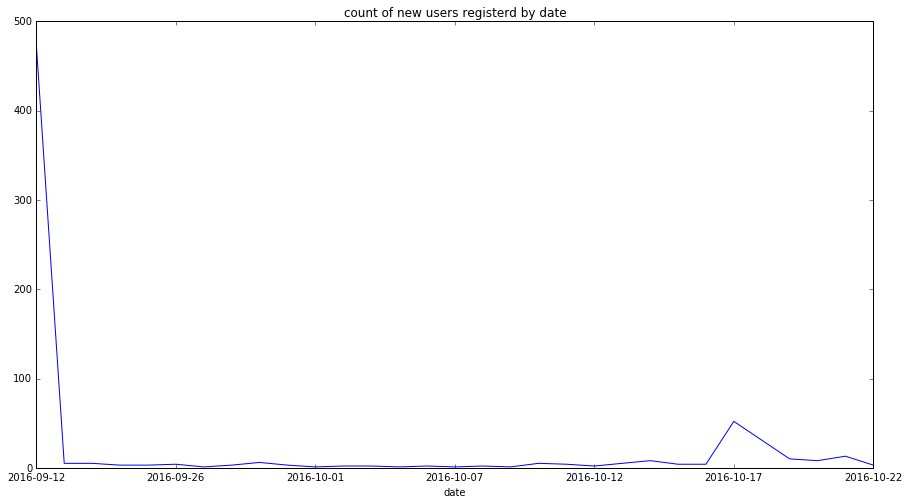

In [140]:
counts.plot(figsize=(15, 8))
plt.title("count of new users registerd by date")

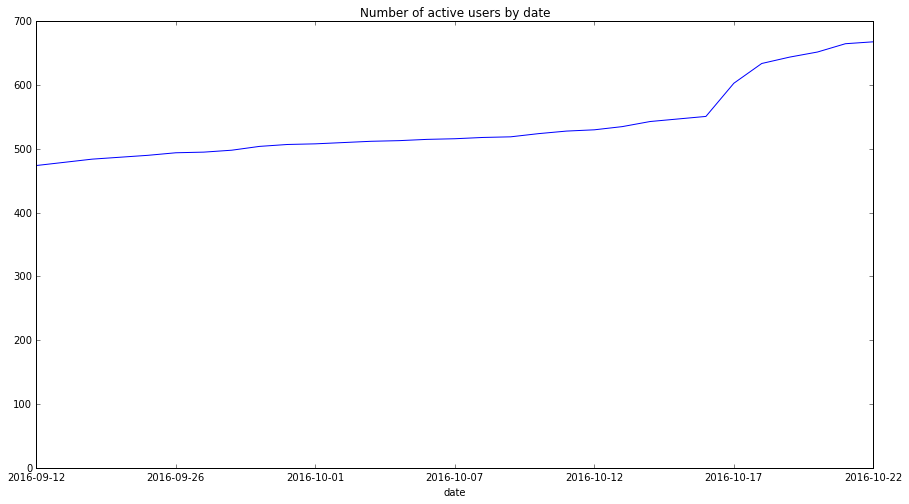

In [141]:
counts.cumsum().plot(figsize=(15, 8))
plt.ylim((0, 700))
plt.title("Number of active users by date")